In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_pickle('saved_df.pkl')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               707 non-null    int64  
 1   Glucose                   707 non-null    int64  
 2   BloodPressure             707 non-null    int64  
 3   SkinThickness             707 non-null    int64  
 4   Insulin                   707 non-null    int64  
 5   BMI                       707 non-null    float64
 6   DiabetesPedigreeFunction  707 non-null    float64
 7   Age                       707 non-null    int64  
 8   Outcome                   707 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.2 KB


In [6]:
df.shape

(707, 9)

<AxesSubplot:>

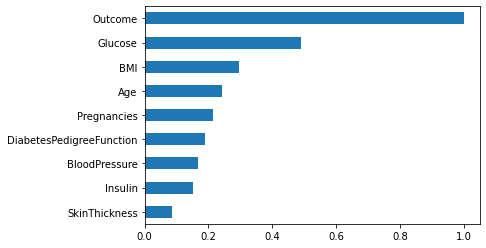

In [10]:
df.corr()['Outcome'].sort_values(). plot.barh()

In [11]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [12]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



## Decision Tree

In [22]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [24]:
y_pred = dt_model.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))

[[75 19]
 [25 23]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        94
           1       0.55      0.48      0.51        48

    accuracy                           0.69       142
   macro avg       0.65      0.64      0.64       142
weighted avg       0.68      0.69      0.68       142



## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [30]:
y_pred = rf_model.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))

[[79 15]
 [21 27]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        94
           1       0.64      0.56      0.60        48

    accuracy                           0.75       142
   macro avg       0.72      0.70      0.71       142
weighted avg       0.74      0.75      0.74       142



## RF Tuning

In [33]:
rf = RandomForestClassifier()

In [34]:
rf_params = {'n_estimators' : [50, 100, 300],
            'max_depth' : [3, 5, 7],
            'max_features' : [2, 4, 6, 8],
            'min_samples_split' : [2, 4, 6]
            }

In [35]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_sa

[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4,

[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_sa

[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   0.7s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8,

[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_sa

[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   0.7s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   0.8s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   0.7s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   0.8s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4,

[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_sa

[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   0.7s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   0.7s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   0.7s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   0.7s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2,

[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_sa

[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=300, total=   0.9s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6,

[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=100 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=100 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=100 
[CV]  max_depth=7, max_features=8, min_sa

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.4min finished


In [37]:
rf_cv_model.best_params_

{'max_depth': 3,
 'max_features': 2,
 'min_samples_split': 6,
 'n_estimators': 300}

In [75]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features = 3,
                                  min_samples_split = 4,
                                  n_estimators = 400).fit(X_train, y_train)

In [76]:
y_pred = rf_tuned.predict(X_test)

In [77]:
print(confusion_matrix(y_test, y_pred))

[[84 10]
 [21 27]]


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        94
           1       0.73      0.56      0.64        48

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.77       142



In [79]:
rf_tuned

RandomForestClassifier(max_depth=7, max_features=3, min_samples_split=4,
                       n_estimators=400)

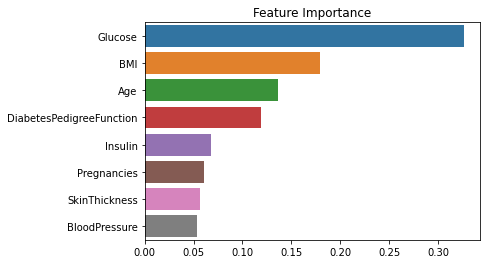

In [80]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

## XGBOOST

In [82]:
from xgboost import XGBClassifier

In [83]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [86]:
y_pred = xgb_model.predict(X_test)

In [87]:
print(confusion_matrix(y_test, y_pred))

[[76 18]
 [23 25]]


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



## Tuning XGBOOST

In [89]:
xgb = XGBClassifier()

In [90]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [91]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5 ..
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 ..
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 ..
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8 ..
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8, total=   0.0s
[CV] lea

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1 ....
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8,

[CV]  learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5, total=   0.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.5, total=   0.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8, total=   0.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8, total=   0.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8 .
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0

[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1 ..
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1 ..
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, sub

[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.8, total=   0.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1, total=   0.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1, total=   0.0s
[CV] learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1, total=   0.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5, total=   0.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5, total=   0.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5,

[CV]  learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.8, total=   0.1s
[CV] learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1, total=   0.1s
[CV] learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1, total=   0.1s
[CV] learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1 ...
[CV]  learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1, total=   0.1s
[CV] learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.5, total=   0.1s
[CV] learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.5, total=   0.2s
[CV] learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.5 .
[CV]  learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.5,

[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   25.8s finished


In [92]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1}

In [125]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 5,
                                n_estimators= 50,
                                subsample= 0.8).fit(X_train, y_train)

In [126]:
y_pred = xgb_tuned.predict(X_test)

In [127]:
print(confusion_matrix(y_test, y_pred))

[[79 15]
 [21 27]]


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        94
           1       0.64      0.56      0.60        48

    accuracy                           0.75       142
   macro avg       0.72      0.70      0.71       142
weighted avg       0.74      0.75      0.74       142



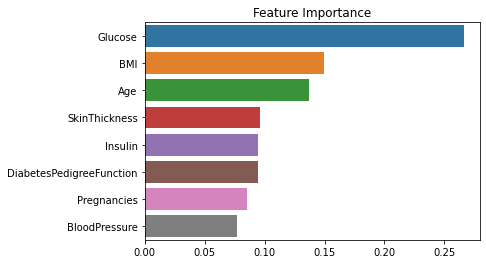

In [129]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()